#### Blossom Bank also known as BB PLC is a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London, UK.










### PROBLEM STATEMENT
- Building a machine learning model to predict online payment Fraud

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data set
data=pd.read_csv(r'C:\Users\Amaka B\Downloads\Online Payment Fraud Detection.csv')

In [3]:
#view the first five rows
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


### Data Dictionary

-  step: represents a unit of time where 1 step equals 1 hour

- type: type of online transaction

- amount: the amount of the transaction

- nameOrig: customer starting the transaction 

- oldbalanceOrg: balance before the transaction 

- newbalanceOrig: balance after the transaction 

- nameDest: recipient of the transaction

- oldbalanceDest: initial balance of recipient before the transaction

- newbalanceDest: the new balance of the recipient after the transaction

- isFraud: fraud transaction

### Data Cleaning
- Checking Missing Values 

- Checking if our features have the right Dtypes

- Checking duplicates

- Renaming or Replacing texts

In [4]:
#check for missing values
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [5]:
#data types of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [6]:
#check for duplicates
data.duplicated().sum()

0

In [7]:
#to view column names
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [8]:
#dimensionality(rows and column)
data.shape

(1048575, 10)

In [9]:
#statistical analysis
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


### Exploratory Data Analysis

<AxesSubplot:title={'center':'visualizing missing values in the dataset'}>

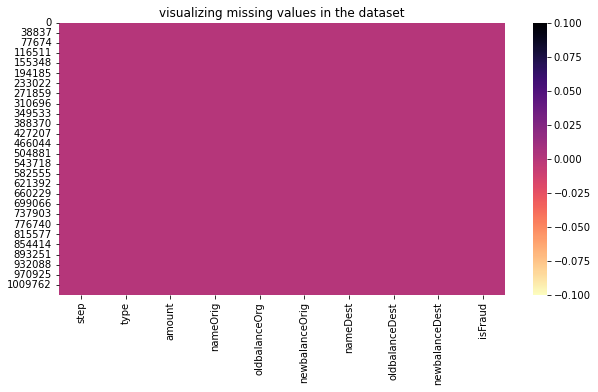

In [10]:
# visualize the missing values
plt.figure(figsize = (10, 5))
plt.title("visualizing missing values in the dataset")
sns.heatmap(data.isnull(), cbar=True, cmap="magma_r")

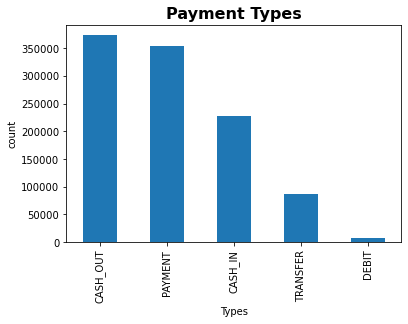

In [11]:
#view the types of payments
data.type.value_counts().plot.bar()
plt.title('Payment Types',fontweight='bold',fontsize=16)
plt.xlabel('Types')
plt.ylabel('count')
plt.show()

##### Cash out types is the most occuring type of payment followed by Payment types

In [12]:
#payment types used mostly for transactions
data.groupby('type')[['amount']].mean().sort_values(by='amount',ascending=False)

,amount
type,
TRANSFER,634403.832422
CASH_OUT,184039.592505
CASH_IN,169923.648522
PAYMENT,11122.907151
DEBIT,5878.516989


array([<AxesSubplot:ylabel='amount'>], dtype=object)

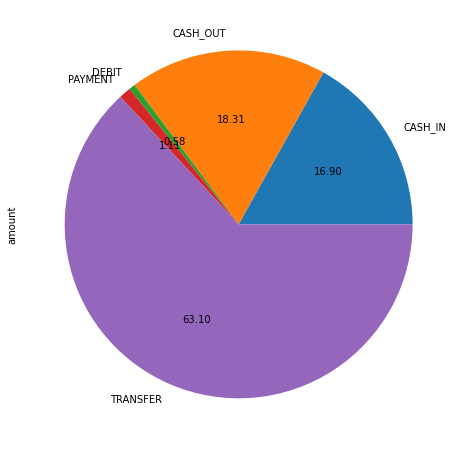

In [13]:
#visualizing the mostly used payment types
data.groupby('type')[['amount']].mean().plot(kind='pie',figsize=(10,8),subplots=True,legend=False,autopct='%.2f')

##### 63% of transactions was made through transfers.
##### Maximum amount of money was made through Transfer type

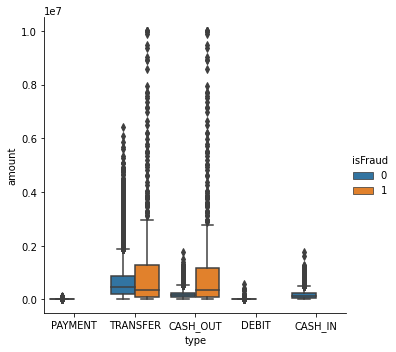

In [14]:
#payment types that might show chances of fraud
sns.catplot(data=data,x='type',y='amount',hue='isFraud',kind='box')

##### Transfer and cash_out types were used for fraudlent transactions

Total number of fraud payemnt: 1142
Total number of non-fraud payment: 1047433


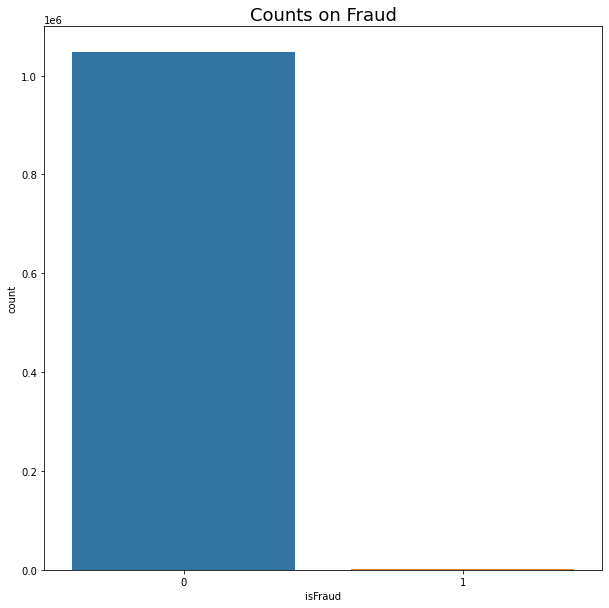

In [15]:
#fraud payments and non-fraud payments
plt.figure(figsize=(10,10))
f1=data.loc[data.isFraud==1]
f0=data.loc[data.isFraud==0]
sns.countplot(x='isFraud',data=data)
plt.title("Counts on Fraud",fontsize=18)
print('Total number of fraud payemnt:',f1.isFraud.count())
print('Total number of non-fraud payment:',f0.isFraud.count())

<AxesSubplot:>

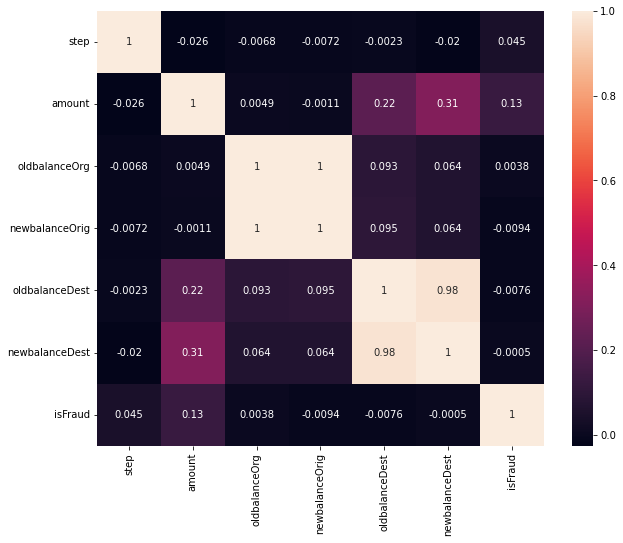

In [16]:
#correlation
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

- The correlation between newbalanceDest and oldbalancedest is 0.98 (positive correlation).
- The correlation between newbalanceorig and oldbalanceorg is 1(positive correlation).
- There are no correlation between fraud and steps.

### Feature Engineering
In this stage we prepare the data for modelling. It's all about selecting, manipulating and transforming data into features that your machine learning algorithms can work better with.

### One-Hot Encoding

With one-hot encoding, we convert categorical data into numerical.

Each value of a column is pivoted into a column of it's own. The values in this new column will be either 1 or 0 to show whether that value exists or not.

In [17]:
#make a copy of our dataset
df=data.copy()
#view
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [18]:
#select categorical variables
category=['type']

In [19]:
#filter using the categorical variables created
df[category]

,type
0,PAYMENT
1,PAYMENT
2,TRANSFER
3,CASH_OUT
4,PAYMENT
...,...
1048570,CASH_OUT
1048571,PAYMENT
1048572,PAYMENT
1048573,PAYMENT


In [20]:
# use pd.get_dummies() for one hot encoding
category_dummy=pd.get_dummies(df[category])
#view the dataset
category_dummy.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [21]:
#view the data types
category_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   type_CASH_IN   1048575 non-null  uint8
 1   type_CASH_OUT  1048575 non-null  uint8
 2   type_DEBIT     1048575 non-null  uint8
 3   type_PAYMENT   1048575 non-null  uint8
 4   type_TRANSFER  1048575 non-null  uint8
dtypes: uint8(5)
memory usage: 5.0 MB


In [22]:
#join the encoced into the original dataset
df=pd.concat([df,category_dummy],axis=1)

In [23]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [24]:
#remove the categorical variables
df=df.drop(category,axis=1)

In [25]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


### Machine Learning

In [26]:
#import the libraries
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


In [27]:
#set your target(y as the isfraud column)
y=df[['isFraud']]

In [28]:
#set x as the df data except isfraud column
X=df.drop(columns=['isFraud','nameOrig','nameDest'],axis=1)

In [29]:
#split into training using a 30% split ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
y.head()

,isFraud
0,0
1,0
2,1
3,1
4,0


In [31]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [32]:
#logistic regression expects data to be scaled
#import StandardScaler
from sklearn.preprocessing import StandardScaler

In [33]:
#data scaling steps for train data set
scaler = StandardScaler()
X_train_scaled  =scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

In [34]:
#data scaling test for test dataset
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

### Building Models

### Logistic Regression

In [35]:
#initialize Logisitc Regression 
LR=LogisticRegression()

In [36]:
#train the models
LR.fit(X_train,y_train)

LogisticRegression()

In [37]:
#predict fraud transactions
LR_preds=LR.predict(X_test)
LR_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
#compare actual and predicted prices
print('Actual prices:', y.head())
print('Predicted prices:', LR_preds[:5])

Actual prices:    isFraud
0        0
1        0
2        1
3        1
4        0
Predicted prices: [0 0 0 0 0]


In [39]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,LR_preds)
print(mae)

0.0008138015659322319


In [40]:
#generate a classification Report
print(classification_report(y_test,LR_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.95      0.28      0.43       349

    accuracy                           1.00    314573
   macro avg       0.98      0.64      0.72    314573
weighted avg       1.00      1.00      1.00    314573



- Logistic Regression model showed precision of 95%, which means that this model predicited that 95% of customer's transactions that was flagged fraud is true.
- recall says that out of the number of customer's transactions that was fraud; 28% of that predicition is correct
- Accuracy of logistic regression model is 100% which might be signs of unbalanced data or overfitting.

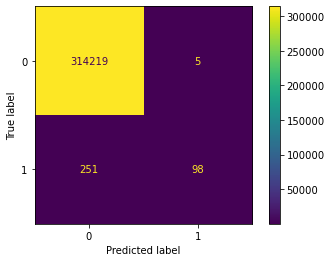

In [54]:
#import plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR,X_test,y_test)

- This model(logisitic regression) predicted 98 clients correctly (true positives) as clients who actually made fraud transactions.

- Logistic Regression predicted that 251 transactions by client's were not fraud, but their transactions was actually fraud.This is known as false negatives (type 2 error). to avoid this, we should aim for high recall.
- its safer for our model to make type 1 errors(false positive) which can  easily be rectified.

- The number of false negatives is much higher than true positives



### Random Forest

In [42]:
#initalize Random Forest
RF=RandomForestClassifier()

In [43]:
#train your model
RF.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
#store your predicition in a new variable
RF_preds=RF.predict(X_test)

In [45]:
#compare actual and predicted prices
print('Actual prices:', y.head())
print('Predicted prices:', RF_preds[:5])

Actual prices:    isFraud
0        0
1        0
2        1
3        1
4        0
Predicted prices: [0 0 0 0 0]


In [47]:
#print a classification report
print(classification_report(y_test,RF_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.95      0.81      0.87       349

    accuracy                           1.00    314573
   macro avg       0.97      0.91      0.94    314573
weighted avg       1.00      1.00      1.00    314573



- Random Forest model showed precision of 95%, which means that this model predicited that 95% of customer's transactions that was flagged fraud is true.
- Recall shows that out of the number of customer's transactions that was predicted correctly; 81% of that predicition is correct
- Accuracy of Random Forest model is 100% which might be signs of unbalanced data or overfitting.

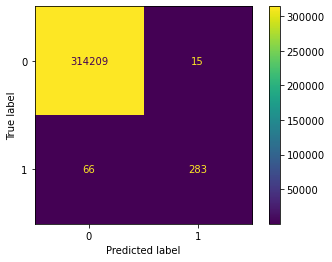

In [48]:
#confusion matrix
plot_confusion_matrix(RF,X_test,y_test)

- Random Forest predicted 283 clients correctly (true positives) as clients who actually made fraud transactions.

- This model predicted that 66 transactions by client's were not fraud, but their transactions was actually fraud.This is known as false negatives (type 2 error). to avoid this, we should aim for high recall.
- It's safer for our model to make type 1 errors(false positive) which can  easily be rectified.

- This time , our model predicted more true positive's than false negative as compared with logistic regression.

### cross validation using cross val scores 

In [49]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression


In [50]:
#Logistic Regression
LRC=LogisticRegression()
#train
LRC_scores=cross_val_score(LRC,X_train,y_train,cv=3)
#mean
LRC_mean=LRC_scores.mean()

In [51]:
#Random Forest
RFV=RandomForestClassifier()
#Train
RFV_scores=cross_val_score(RFV,X_train,y_train,cv=3)
#mean
RFV_mean=RFV_scores.mean()

In [52]:
#put the results as a dict and store in a variable
results={'Models':['Logistic Regression','RandomForest'],'CrossVal Mean Scores':[LRC_mean,RFV_mean]}
#save it as a datframe
output=pd.DataFrame(data=results)

In [53]:
output

,Models,CrossVal Mean Scores
0,Logistic Regression,0.999195
1,RandomForest,0.999757


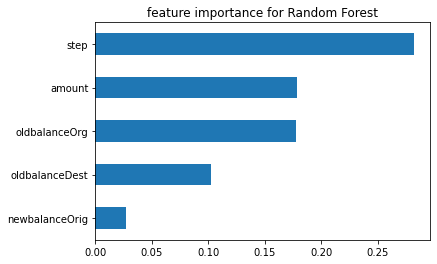

In [59]:
#get feature importance for decision tree
RF_importances=pd.DataFrame(data=RF.feature_importances_,index=X_test.columns,columns=['Importance'])

#plot top 5 feature importances, sorted
RF_importances[:5].sort_values(by='Importance').plot.barh(legend=False)

plt.title('feature importance for Random Forest')
plt.show()

Top 5 Feature importance from our model are:
- steps
- amount
- old balance Org
- old balance Dest
- new balance Orig

### summary

- Random Forest has a better recall than logistic regression
- Though they both have high accuracy ; f1 score, precision and recall of random forest is way better than Logistic Regression.
- Blossom bank should be more concerned on true positives and follow the important features to look out for fraud transactions as type 2 errors (false negative) are dangerous.
